# Logistic regression using numpy

## Note: the equations here below are not being rendered in github due to its markdown. Run the notebook locally to see them (or see the readme, the introduction here is the same
### Learning method: mini-batch gradient descent
----------

## Quick intro to logistic regression

Logistic regression can be used for categorical classification. In our case, we will focus on a model of binary classification.

A logistic/sigmoid function will be fitted to the data. This function tends to 1 as z -> infinite and to 0 as z -> -infinite, and is as follows:

<center>$h(z) = \frac{1}{1 + \exp{z}}$</center>

To obtain a 0 or 1 output, one just simply sets a threshold at 0.5: everything below is zero and everything above is one.

Having a dataset with a series of samples, each of those with their given features, we can express z in matrix form as follows:

<center>$z = X\theta$</center>

<center>$h(X\theta) = \frac{1}{1 + \exp{X\theta}}$</center>

Where X is the matrix of [samples] rows and [features] columns, and theta is the vector of the model parameters (weights of our regressor).

The objective will be to obtain that theta vector given a set of X and y([0,1]), that best fits the data. How? Minimizing the cost function of the problem.

The cost function J of a logistic regression problem is the following:

<center>$J(\theta) = -\frac{1}{n} \sum_{i = 1}^{n} (y*log(h(X\theta)) + (1-y)*log(1-h(X\theta)))$</center>

To find the theta that minimizes the error between the predicted and the real data, an iterative process where that cost function is derived to find its minimum and update the theta parameters to go towards it will be applied. This is called gradient descent:

<center>$\theta = \theta - \frac{\delta J(\theta)}{\delta\theta}$</center>

with

<center>$\frac{\delta J(\theta)}{\delta\theta} = \frac{1}{n} X^{T}[h(X) - y]$</center>

Different ways to update the parameter in function of the gradient can be applied (once for every data entry, once for all the dataset...). In this case, it has been decided to do it in small batches, thus we will be appliying minibatch gradient descent.

--------------------
### Tested with the *Breast Cancer Wisconsin (Diagnostic) Data Set*, included in *sklearn* (569 samples)
- For each cell nucleus 10 different features are stated (radius, texture, area, compactness...)
- For each feature three values appear: mean, error and worst
- This leads to a 30 dimensional classification problem, into two categories: benign or malignant cell

------------------------------------------

#### Import libraries   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

Before going into the data:
    1. A class will be created containing the regressor and all of its methods.

In [2]:
# 1 The logistic regressor class and its methods
class LogisticReg:
    '''
        Logitic Regression, by Wladi Arce.
        
        This class creates an instance of a logistic regressor, which allows to classify data
        into 2 categories, 0 and 1.
    '''
    def __init__(self):
        self.theta = 0.5 * np.random.randn(x_train_scaled.shape[1], 1) #Initializes randomly the weights
        
    def sigmoid(self, x):
        '''
            Performs logistic regression given the matrix of parameters
        '''
        probability = 1/(1 + np.exp(-np.matmul(x, self.theta)))
        return probability
    
    def compute_cost(self, x, y):
        '''
            Cost function
        '''
        cost = np.mean(-y*np.log(self.sigmoid(x)) - (1-y)*np.log(1-self.sigmoid(x)))
        return cost
    
    def compute_gradient(self, x, y):
        '''
            Calculates the gradient given the expected output and the parameters
        '''
        gradient = np.mean(np.matmul(x.T,self.sigmoid(x)-y))
        return gradient

    def fit(self, x, y, learning_rate = 0.01, batch_size = 10, epochs = 50):
        '''
            Fits the regressor to the data using minibatch gradient descent as follows:
            
            x
            y
            learning_rate (default 0.01)
            batch_size (default 10)
            epochs (default 50)
            
            compute number of batches
            for each epoch:
                shuffle dataset
                for i in number_of_batches:
                    x_batch = select [batch_size] of the features dataset
                    y_batch = select [batch_size] of the output dataset
                    compute gradient with x_batch, y_batch
                    apply gradient descent to update the parameters                          
        '''
        num_samples = x.shape[0]
        N_iterations = int(num_samples / batch_size) * epochs
        start = 0
        end = 0
        
        for step in range(N_iterations):
            # if new epoch, shuffle the data
            if step % (num_samples / batch_size) == 0:
                indexes = np.random.permutation(x.shape[0])
                y = y[indexes]
                x = x[indexes]
            
            # create a mini-batch of data to train on
            end = start + batch_size
            if end >= num_samples:
                end = num_samples
            x_batch = x[start:end, :]
            y_batch = y[start:end]
            start = 0 if end >= num_samples else end

            # update parameters using a x_step and y_step
            self.theta= self.theta - learning_rate * self.compute_gradient(x_batch, y_batch)
        training_cost = self.compute_cost(x[:,:], y)
        print('training cost: %f' %training_cost)
        
    def predict(self, x):
        '''
            Is basically the sigmoid function, but will convert the probabilities into binary values
        '''
        return self.sigmoid(x) >= 0.5

    2. Some auxiliary functions to analyze its performance will be included: accuracy and plotting of the confusion matrix (will use sklearn for this)

In [3]:
# 2 The confusion matrix and the accuracy calculator

def compute_accuracy(y_real, y_pred):
    '''
        Checks how many values are equal between the real data and the predicted data
    '''
    correct = y_real == y_pred
    return np.sum(correct)/correct.shape[0]

# This function has been taken from sklearn documentation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Everything is ready, lets try to model something!

## Step 1: prepare the data

The dataset is imported from sklearn. Data and targets are assigned and the set is split into training and test.

As well, the features are scaled by removing their mean and dividing by the standard deviation.

Finally, as we are solving a regression problem, an intercept term (one) is added at the beginning of each data sample.

In [4]:
from sklearn.datasets import load_breast_cancer

# load the dataset
data = load_breast_cancer()
x = data.data
y = data.target

# split into training and test sets
N_train = int(0.8 * x.shape[0])

x_train = x[:N_train,:]
y_train = np.reshape(y[:N_train], (-1,1))
x_test = x[N_train:,:]
y_test = np.reshape(y[N_train:], (-1,1))

# scale features by removing mean and dividing by the standard deviation
x_train_scaled = (x_train - np.average(x_train, 0))/np.std(x_train)
x_test_scaled = (x_test - np.average(x_test, 0))/np.std(x_test)

# Add intercept terms and initialize parameters
x_train_scaled = np.hstack((np.ones((x_train_scaled.shape[0], 1)), x_train_scaled))
x_test_scaled = np.hstack((np.ones((x_test_scaled.shape[0], 1)), x_test_scaled))

## Step 2: fit it to a regression model

In [5]:
# An instance of the Regression model will be created, and the fit method run with the train set

classifier = LogisticReg()
classifier.fit(x_train_scaled, y_train)

training cost: 0.225676


## Step 3: check its accuracy against the test data

Test cost:  0.326889553023996
Accuracy on test set: 0.87
Confusion matrix, without normalization
[[26  0]
 [15 73]]


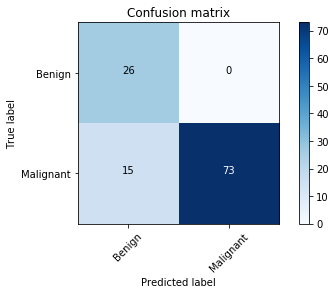

In [6]:
# Having the model fit, values for the test set will be predicted, and 
# then compared against the real output. The accuracy will be computed
# and the confusion matrix will show in a very visual way its performance

# PREDICTION
y_pred = classifier.predict(x_test_scaled)

# TEST SET COST
test_cost = classifier.compute_cost(x_test_scaled,y_test)
print('Test cost: ',test_cost)

# ACCURACY
print("Accuracy on test set: {:.2f}".format(compute_accuracy(y_test,y_pred)))

# CONFUSION MATRIX
labels = ['Benign','Malignant']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels, title='Confusion matrix')
plt.show()
